# Домашнее задание №2 - Линейные модели. Градиентный спуск

В этом домашнем задании мы с вами научимся обучать линейные модели регрессии и классификации при помощи очень мощного, но в то же время довольно понятного алгоритма, который называется **градиетный спуск**. Помимо линейных моделей он используется и для обучения самых сложных нейронных сетей! Также мы потренируемся применять готовые реализации линейных моделей для задач регрессии и бинарной классификации.

In [698]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
import pandas as pd
import math

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import (LinearRegression,
                                  LogisticRegression)
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import (r2_score,
                             mean_squared_error, plot_confusion_matrix,
                             roc_curve,auc, roc_auc_score)
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [34]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

#### Маленькое теоретическое отступление

Основное свойство антиградиента (-1 * градиент) &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента, пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (коэффициентов линейной модели) ((например, нулевой или сгенерированный из некоторого, случайного распределения)). Тогда обычный градиентный спуск состоит в повторении следующих шагов до сходимости:


$$
    w_{k + 1} = w_{k} - \eta \nabla_{w} Q(w_{k}),
$$

где $\nabla_{w} Q(w_{k})$ &ndash; градиент функции потерь в точке $w_k$, а $\eta$ &ndash; скорость обучения (learning rate).

Градиентный спуск обычно останавливают, когда прошло заданное максимальное количество итераций или когда графиент близок к нулю (т.е. наши параметры практически не меняются). Для реализации второго варианта считают норму градиента (по сути длину вектора). Это можно сделать несколькими способами:

$$
l1_{norm} = \sum{|w_i|}
$$

$$
l2_{norm} = \sum{(w_i)^{2}}
$$

Попробуем разобраться на простом примере. Рассмотрим функцию от двух переменных:
$f(x, y) = \sin^2 x + \sin^2 y$

In [35]:
def f(w):
    """
    :param w: np.array(np.float) вектор из 2-х элементов
    :return: np.float
    """
    
    return np.sum(np.sin(w)**2)

Обратите внимание, что $x$ - numpy-array вектор длины 2.

***Reminder:***  
Что мы хотим? Мы хотим найти минимум этой функции (в машинном обучении мы обычно хотим найти минимум **функции потерь**, например, MSE), а точнее найти $w_1$ и $w_2$ такие, что при них значение $f(w_1, w_2)$ минимально, то есть *точку экстремума*.  
  
Как мы будем искать эту точку? Используем методы оптимизации (в нашем случае - *минимизации*). Одним из таких методов и является **градиентный спуск**.

### Задание 1. Градиентный спуск для функции $f$ (1 балл)

Реализуйте функцию, которая будет осуществлять градиентный спуск для функции $f$:

*Примечание:* Вам нужно посчитать частные производные именно **аналитически** и **переписать их в код**, а не считать производные численно (через отношение приращения функции к приращению аргумента) -- в этих двух случаях могут различаться ответы, поэтому будьте внимательны.

In [36]:
def grad_f(w): 
    """
    Градиент функциии f, определенной выше.
        :param w: np.array[2]: float вектор из 2-х элементов
        :return: np.array[2]: float вектор из 2-х элементов
    """
    
    return np.array(np.sin(2*w[0]), np.sin(2*w[1])) 

Проверим, что градиент принимает вектор из двух чисел и выдает на этой точке верное значение

In [37]:
assert np.allclose(grad_f(np.array([1, 2])), 
                   np.array([0.90929743, -0.7568025])), "Что-то не так!"

AssertionError: Что-то не так!

In [38]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None):
    """
    Функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: скалярная функция двух переменных
        :param grad_f: функция, возвращающая градиент функции f (устроена как реализованная вами выше grad_f)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :return: np.array[num_iter, 2] пар вида (x, f(x))
    """
    
    w0 = np.random.random(2)

    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла == шаг градиентнго спуска
    curr_w = w0.copy()
    for iter_num in range(num_iter):
        entry = np.hstack((curr_w, f(curr_w)))
        history.append(entry)
    
        curr_w -= 0.1 * (grad_f(curr_w))

    return np.vstack(history)

Визуализируем точки градиентного спуска на 3D-графике нашей функции. Звездочками будут обозначены точки (тройки $w_1, w_2, f(w_1, w_2)$), по которым Ваш алгоритм градиентного спуска двигался к минимуму (Для того, чтобы написовать этот график, мы и сохраняли значения $cur\_w_1, cur\_w_2, f(cur\_w_1, cur\_w_2)$ в `steps` в процессе спуска).

Если у Вас правильно написана функция `grad_descent_2d`, то звездочки на картинке должны сходиться к одной из точек минимума функции. Вы можете менять начальные приближения алгоритма, значения `lr` и `num_iter` и получать разные результаты.

In [39]:
def gradient_desc_vis(f, grad_f, lr=0.1, num_iter=20):
    steps = grad_descent_2d(f, grad_f, lr=lr, num_iter=num_iter)
    
    X, Y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))

    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection="3d")

    zs = np.array([f(np.array([x,y]))
                  for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)


    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, zorder=2)

    ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
            marker="*", markersize=20, zorder=3, 
            markerfacecolor="y", lw=3, c="black")

    ax.set_zlim(0, 5)
    ax.view_init(elev=60)
    plt.show()
    
    return steps

/var/folders/5l/9jtg_90x5s575m1zqn_h0kgm0000gn/T/ipykernel_1608/1727858522.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


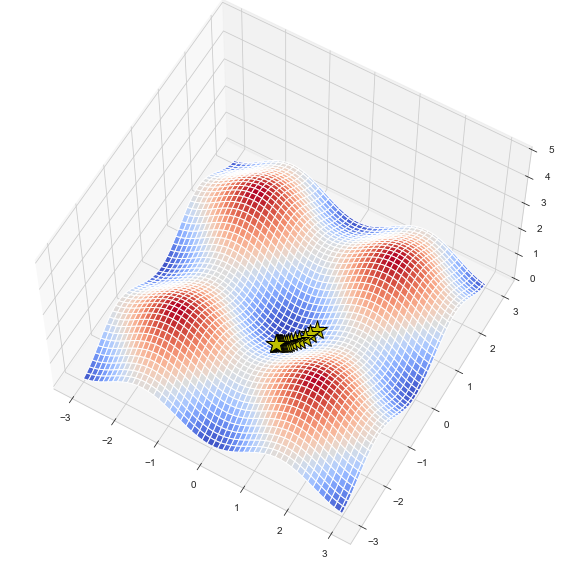

In [40]:
steps = gradient_desc_vis(f, grad_f)

Посмотрим на зависимость значения функции от шага градиентного спуска.

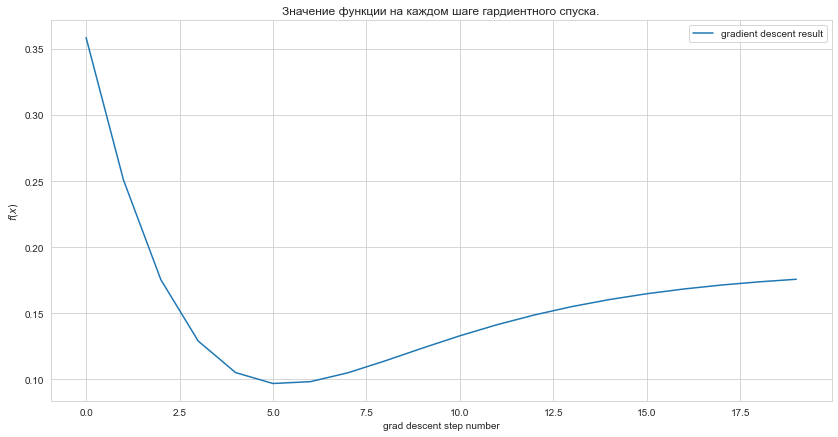

In [41]:
plt.figure(figsize=(14,7))
plt.xlabel("grad descent step number")
plt.ylabel("$f(x)$")
plt.title("Значение функции на каждом шаге гардиентного спуска.")

f_values = list(map(lambda x: x[2], steps))
plt.plot(f_values, label="gradient descent result")
plt.legend();

### Задание 2. Реализация линейной регресии (суммарно 9 баллов)

Так как мы будем использовать градиентный спуск для обучения модели, важной часть является реализация функции потерь и функции для расчета ее градиента. Перем началом стоит напомнить, как считать градиент MSE. Вывод этой формулы можно найти  [здесь](https://medium.com/analytics-vidhya/linear-regression-gradient-descent-intuition-and-math-c9a8f5aeeb22)

$$
    MSE = \frac{1}{N}\sum(y_{true} - y_{pred}) ^ 2
$$

$$
    \nabla{MSE} = \frac{2}{N} X^T (y_{pred} - y_{true})
$$

Здесь имеется в виду именно матричное умножение.

#### Задание 2.1. MSE и ее градиент (2 балла)

In [42]:
def mse(y_true, y_pred):
    """
    Функция потерь MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    return (1 / y_true.shape[0]) * np.sum(np.square(y_true - y_pred))
        
        
    

def mse_grad(y_true, y_pred, X):
    """
    Функция для расчета градиента MSE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: градиент функции потерь MSE
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    return (2/y_true.shape[0]) * X.transpose() @ (y_pred  - y_true)


class MSELoss:
    """
    Класс, реализующий функцию потерь MSE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """
    
    def __call__(self, y_true, y_pred):
        return mse(y_true, y_pred)
    
    def calculate_gradient(self, y_true, y_pred, X):
        return mse_grad(y_true, y_pred, X)

Мы будем использовать следующий класс для расчета градиента наших функций потерь:

In [43]:
class BasicGradientDescent:
    """
    Класс, позволяющий делать шаги градиентного спуска,
    а также рассчитывающих норму градиента.
    """
    
    def __init__(self, loss_function, grad_norm):
        self.loss = loss_function
        self.grad_norm = grad_norm
        
    
    def step(self, y, y_pred, X):
        grad_i = self.loss.calculate_gradient(y, y_pred, X)
        grad_i_norm = self._calculate_grad_norm(grad_i)
        
        return grad_i, grad_i_norm
            
            
    def _calculate_grad_norm(self, grad_i):
        if self.grad_norm == "l1":
            return np.abs(grad_i).sum()
        elif self.grad_norm == "l2":
            return np.sqrt(np.square(grad_i).sum())
        else:
            raise ValueError(f"I can't calculate {self.grad_norm} norm of gradient")

В данном задании нужно будет реализовать линейную регрессию и обучить ее при помощи градиентного спуска. Для этого нужно будет заполнять пропуски кода в соответствующих классах. Для начала мы реализуем базовый класс для всех линейных моделей, от которого потом будем наследоваться при реализации линейной и логистической регресий. Не переживайте, этот класс уже реализован, вам достостаточно просто разобраться с кодом.

In [457]:
class BaseLinearModel:
    """
    Класс, который представляет из себя базовую линейную модель, наследуюясь от которого, мы будем
    реализовывать линейную и логистическую регрессии.
    """
    
    def __init__(self, learning_rate, 
                 loss_function, fit_intercept,
                 n_iter, tol, optimizer, grad_norm):
        """
        Конструктор нашего класса. 
            :param learning_rate: скорость обучения
            :param loss_function: функция потерь (MSE или кросс-энтропия)
            :param fit_intercept: нужно ли нам включать свободных член в модель
            :param n_iter: количество итераций градиентного спуска
            :param tol: параметр для остановки градиентного спуска,
                        если норма градиента (l1 или l2) меньше tol, то останавливаемся
            :param optimizer: класс, который будет рассчитывать градиент и его норму
            :param grad_norm: тип нормы градиента l1 или l2
        """
        
        self.learning_rate = learning_rate
        self.loss = loss_function
        self.fit_intercept = fit_intercept
        self.n_iter = n_iter
        self.tol = tol
        self.grad_norm = grad_norm
        self.optimizer = optimizer(loss_function, grad_norm)
        
        # В начале параметры модели не заданы
        self.W = None
        
        
    def fit(self, X, y):
        """
        Метод для обучения нашей модели 
            :param X: матрица объекты x признаки
            :param y: вектор значений целевой переменной
            :return: обученная модель
        """
        
        # Сделаем из y вектор-столбец (n_samples, 1)
        y = y.reshape(-1, 1)
        n_samples = X.shape[0]
        
        # Добавим колонку из 1 в матрицу X
        if self.fit_intercept:
            ones_column = np.ones((n_samples, 1))
            X_new = np.hstack((ones_column, X))
        
        n_features = X_new.shape[1]
        
        # Инициализируем веса модели
        if self.W is None:
            self.W = np.random.randn(n_features, 1)
        
        # Обучаем модель градиентным спуском
        for i in range(self.n_iter):
            y_pred = self.predict(X)
            grad_i, grad_i_norm = self.optimizer.step(y, y_pred, X_new)
            
            # Если градиент близок к 0, останавливаемся
            if grad_i_norm <= self.tol:
                return self
            
            else:
                self.W -= self.learning_rate * grad_i
                
        return self
    
    
    def predict(self, X):
        raise NotImplementedError("It is a basic class for all linear models. You should implement it for descendant class.")
    
    
    def __repr__(self):
        return "Base linear model without prediction skill :("

#### Задание 2.2. Предсказания линейной регрессии (3 балла)

Реализуйте метод `predict` у класса `CustomLinearRegression`, не забудьте про свободный член!

In [415]:
class CustomLinearRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-2, 
                 loss_function=MSELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):
        
        # Если вы не проходили наследование и в частности `super`, то не страшно
        # коротко, с помощью этого мы можем вызывать методы родительского класса
        # в частности здесь мы используем метод `init`
        super().__init__(learning_rate=learning_rate, 
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)
        
    
    def predict(self, X_test):
        """
        Метод для вычисления предсказаний 
            :param X_test: np.array[n_test_samples, n_features]: 
                           матрица объекты x признаки (тестовый датасет)
            :return: y_pred: np.array[n_test_samples, 1]: предсказания модели
        """
        
        if self.W is None:
            raise NotFittedError("This CustomLinearRegression instance is not fitted yet, run fit method.")
        
        n_test_samples = X_test.shape[0]
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))
            
        # y_pred = np.zeros(n_test_samples)
        y_pred = self.W[0] + X_test[:,1:] @ self.W[1:]    
        
        return y_pred
    
    
    def __repr__(self):
        return "My custom linear regression"

##### Проверим нашу реализацию на простом примере

In [416]:
X = np.random.randn(100, 1)
y = 2 * X + 5 + 0.5 * np.random.randn(100, 1)

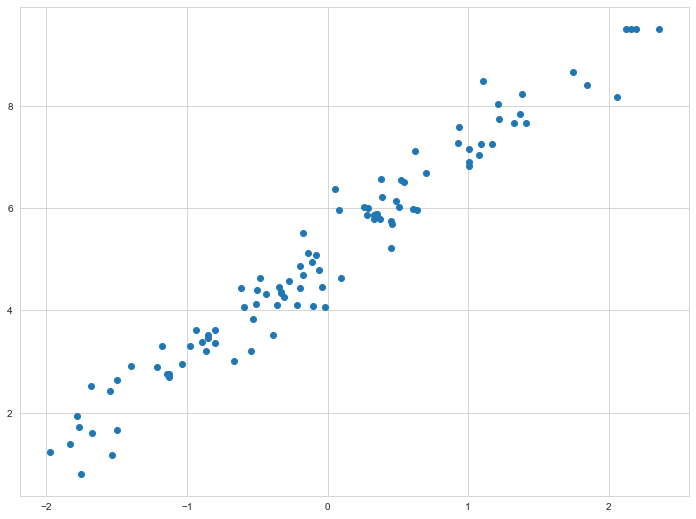

In [93]:
plt.scatter(X, y);

In [417]:
custom_lin_reg = CustomLinearRegression()

In [418]:
custom_lin_reg.fit(X, y)

My custom linear regression

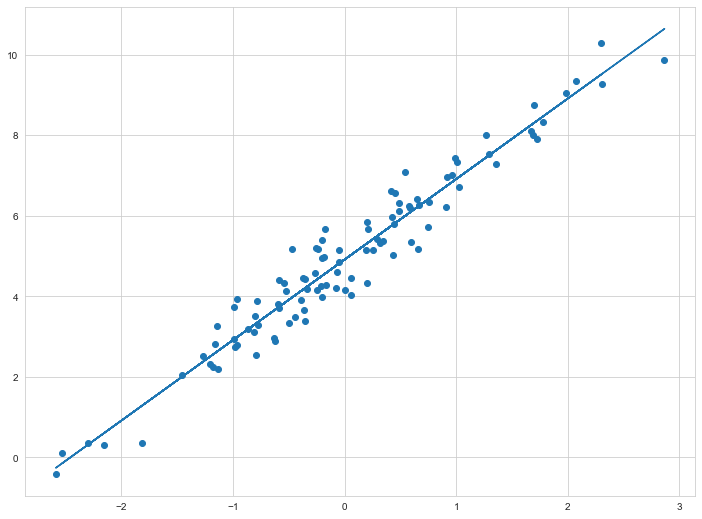

In [419]:
plt.scatter(X, y)
plt.plot(X, custom_lin_reg.predict(X));

#### Задание 2.3. Используем встроенную линейную регрессию (4 балла)

Поработаем с данными о ценах на дома в Бостоне. Постройте модель линейной регресии при помощи `LinearRegression` из `sklearn`. Не забудьте разделить данные на тренировочную и тестовую части, а также правильно предобработать признаки. В конце воспользуйтесь какими-то изученными метриками регресии и сделайте выводы о качестве полученной модели, а также о том, какие признаки наиболее важны с точки зрения полученной модели.

In [571]:
data = load_boston()
X, y = data["data"], data["target"]
feature_names = data["feature_names"]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

Названия наших колонок

In [238]:
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Сделаем краткий EDA для наших данных

Описание наших колонок:
    
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000 dollars
11. PTRATIO - pupil-teacher ratio by town
12. `B - 1000(Bk - 0.63)^2` where Bk is the proportion of blacks by town
13. LSTAT -  percent lower status of the population
y(target). MEDV - Median value of owner-occupied homes in 1000's dollars

Сперва визуализируем все наши признаки

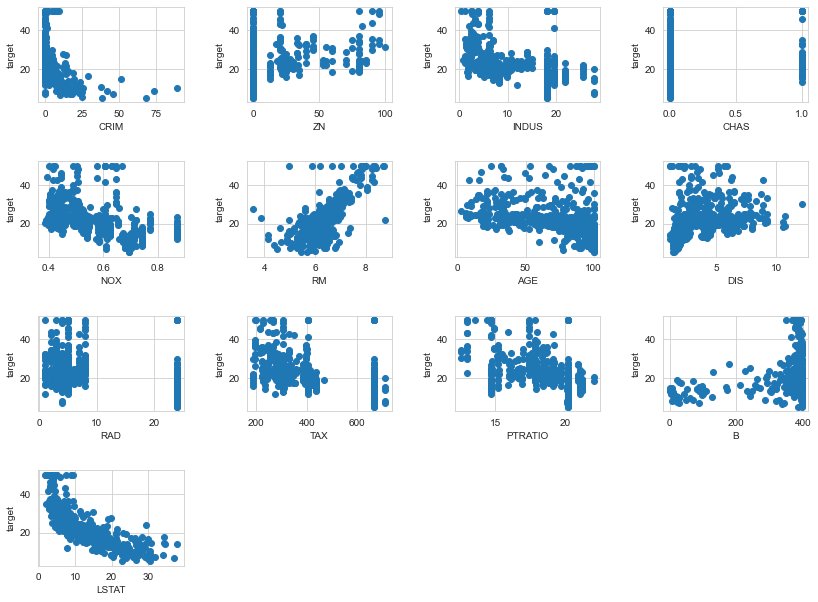

In [241]:
for i in range(1, len(feature_names)+1):
    plt.subplot(4,4, i)
    plt.scatter(x = X[:,i-1], y = y)
    plt.xlabel(feature_names[i-1])
    plt.ylabel('target')
plt.tight_layout(pad=3.0)

Теперь посмотрим на коэффициент корреляции между независимыми переменными и нашей зависимой переменной!
Мы можем увидеть, что самый большой по модулю коэффициент корреляции у 13 признака, а также у 6 признака.

In [582]:
cor_list = []
for i in range(len(feature_names)):
    cor_list.append(np.corrcoef(X[:,i], y)[1,0])
cor_list

[-0.3883046085868113,
 0.3604453424505428,
 -0.48372516002837274,
 0.17526017719029852,
 -0.42732077237328264,
 0.6953599470715396,
 -0.3769545650045963,
 0.24992873408590394,
 -0.3816262306397777,
 -0.468535933567767,
 -0.5077866855375618,
 0.3334608196570665,
 -0.7376627261740147]

Здесь видно, что у некоторых переменных нет зависимости (например 'CHAS')

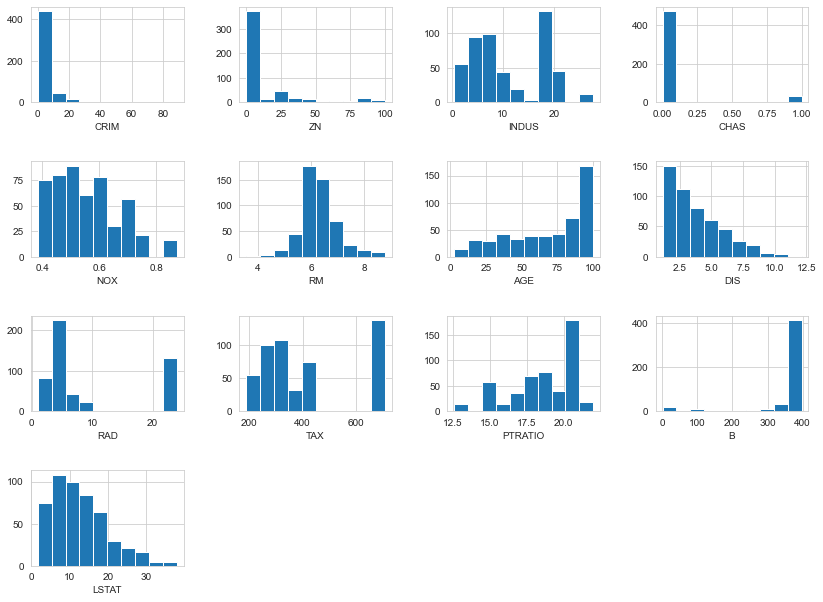

In [242]:
for i in range(1, len(feature_names)+1):
    plt.subplot(4,4, i)
    plt.hist(x = X[:,i-1])
    plt.xlabel(feature_names[i-1])
plt.tight_layout(pad=3.0)

Также видно, что распределение большинства выборок отличаются от нормального

После нужно стандартизировать наши данные

In [464]:
scale= StandardScaler()
X_scaled = scale.fit_transform(X)

Создаем тренировочные и тестовые данные

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=1/3,random_state=0) 

Задаем нашу модель

In [466]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [467]:
y_pred = reg.predict(X_test) 

In [468]:
r_sq_test = reg.score(X_test,y_test)
print('R square для нашей модели на тестовой выборке:', r_sq_test)

r_sq_train = reg.score(X_train,y_train)
print('R square для нашей модели на тренировочной выборке:', r_sq_train)

R square для нашей модели на тестовой выборке: 0.6694221114991401
R square для нашей модели на тренировочной выборке: 0.7682544344458999


Значение `R square` является хорошим в обоих случаях. На самом деле, у меня есть некоторые сомнения к каким именно переменным применять метод `score`, так как в мануале написано применять их для теста, но многие туториалы делают это для train данных

In [469]:
print('intercept:', reg.intercept_)
print('slope:', reg.coef_)

intercept: 22.424809829218983
slope: [-1.01635146  1.1121803   0.02125715  0.64134835 -1.97422602  2.57631961
 -0.30040384 -3.34882185  2.17993934 -1.8281366  -2.27063755  0.55465463
 -3.68827246]


На этом этапе мы можем заметить, что больший вклад на нашу независимую переменную оказывают переменные:
   1. 8 - 'DIS' *weighted distances to five Boston employment centres*
   2. 13 - 'LSTAT' *lower status of the population*

Теперь рассчитаем MSE для нашей модели:

In [532]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('R_square:', r2_score(y_test, y_pred))

MSE: 26.36186328796812
R_square: 0.6694221114991401


Кажется, значение MSE велико, скорее всего это из-за того, что в нашей модели присутсвует больше 3-ех независимых переменных, а также не все переменные хорошо коррелирует с нашей независимой переменной, это можно увидеть в EDA выше. НО! R square имеет хороший показатель!

### Теперь посторим плоты для двух переменных 

Text(0, 0.5, 'targer')

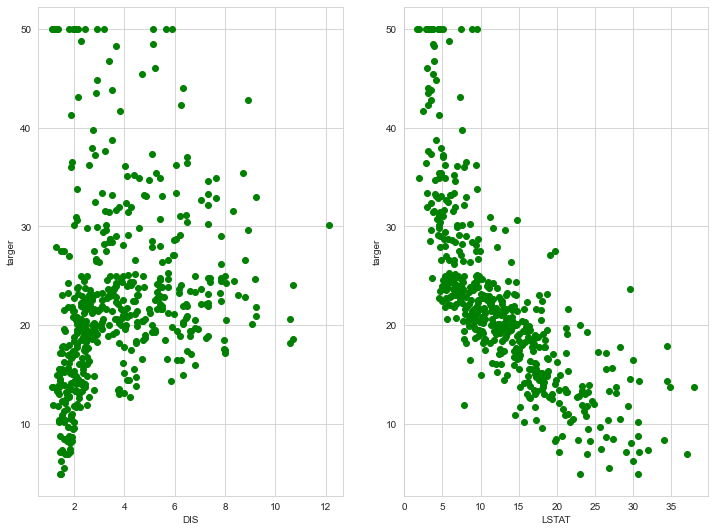

In [471]:
plt.subplot(1,2, 1)
plt.scatter(X[:,7], y, color='green')
plt.xlabel(feature_names[7])
plt.ylabel('targer')

plt.subplot(1,2, 2)
plt.scatter(X[:,12], y, color='green')
plt.xlabel(feature_names[12])
plt.ylabel('targer')



Здесь мы видим, что зависимость дейтсвительно существует 

### Задание 3. Реализация логистической регресии (суммарно 10 баллов)

Логистическая регрессия не очень сильно отличается от обычной линейной регрессии и используется в задах классификации. Так как здесь мы снова будем пользоваться градиентным спуском, то нужно определить функцию потерь и ее градиент. Одним из самых популярных вариантов в задаче бинарной классификации является бинарная кросс-энтропия (BCE).

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Единственная проблема данной функции это возможность получить 0 под знаком логарифма, что не очень хорошо. Попробуем справить с этим "в лоб". Скажем, что наши предсказания могут принимать значения от 0 + eps до 1 - eps, где eps очень маленькое число.

#### Задание 3.1. Реализация сигмоиды (0.5 баллов)

Реализуйте функцию `sigmoid`, которая переводит действительное число $\mathbb R$ в вероятность $[0,1]$.

In [539]:
def sigmoid(output):
    # output результат X@w (-inf, +inf)
    sig = 1 / (1 + np.exp(-output))
    
    return sig

#### Задание 3.2. BCE Loss и ее градиент (2.5 балла)

Так как мы с вами только начинаем изучать машинное обучение, то было бы слишком жестоко просить вас вычислить градиент BCE Loss (он не так сложен, просто нужно привыкнуть). Поэтому сразу напишем формулу для него:

$$
\nabla{\mathcal L_{BCE}(y, \hat y), X} = X^T (\sigma({\hat{y}}) - y)
$$

In [540]:
def bce(y_true, y_pred, eps=1e-15):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    n = y_true.shape[0]
    
    # So I want escape log(0)
    y_pred = np.clip(y_pred, eps, 1 - eps)
    
    loss = -1/n * (np.dot(y_true, np.log(sigmoid(y_pred))) + np.dot(1 - y_true , np.log(1 - sigmoid(y_pred))))
    
    return loss
    
    

def bce_grad(y_true, y_pred, X):
    """
    Функция потерь BCE.
        :param y_true: np.array[n_samples]: вектор из правильных ответов 0/1
        :param y_pred: np.array[n_samples]: вектор из предсказаний модели (вероятности)
        :param X: np.array[n_samples, n_features]: матрица объекты x признаки
        :return: значение функции потерь
    """
    
    if  y_true.shape[0] != y_pred.shape[0]:
        raise ValueError("Number of samples in both vectors should be equal")
        
    loss_grad = np.dot(X.transpose(), (sigmoid(y_pred) - y_true))
    return loss_grad
    
class BCELoss:
    """
    Класс, реализующий функцию потерь BCE. Нужен для того, чтобы
    объединять в одном месте функцию потерь и градиент для нее.
    """
    
    def __call__(self, y_true, y_pred):
        return bce(y_true, y_pred)
    
    def calculate_gradient(self, y_true, y_pred, X):
        return bce_grad(y_true, y_pred, X)

#### Задание 3.3. Предсказания логистической регрессии (2 балла)

Реализуйте метод `predict` у класса `CustomLogisticRegression`, не забудьте про свободный член!

In [563]:
class CustomLogisticRegression(BaseLinearModel):
    def __init__(self, learning_rate: float = 1e-3,
                 loss_function=BCELoss(), fit_intercept=True,
                 n_iter=1000, tol=1e-5, optimizer=BasicGradientDescent, grad_norm="l1"):
        
        super().__init__(learning_rate=learning_rate,
                         loss_function=loss_function, fit_intercept=fit_intercept,
                         n_iter=n_iter, tol=tol, optimizer=optimizer, grad_norm=grad_norm)
    
    
    def predict(self, X_test):
        if self.W is None:
            raise NotFittedError("This CustomLogisticRegression instance is not fitted, run fit method.")
        
        n_test_samples = X_test.shape[0]
        
        if self.fit_intercept:
            ones_column = np.ones((n_test_samples, 1))
            X_test = np.hstack((ones_column, X_test))
        
        # y_pred = np.zeros(n_test_samples)
        
        y_pred = sigmoid(self.W[0] + X_test[:,1:] @ self.W[1:])
                
        
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        
        return y_pred
    
    
    def __repr__(self):
        return "My custom logistic regression"

#### Снова проверим работу алгоритма на простом примере

In [567]:
# Создадим датасет из 1 признака и 2 классов
X, y = make_classification(n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1)

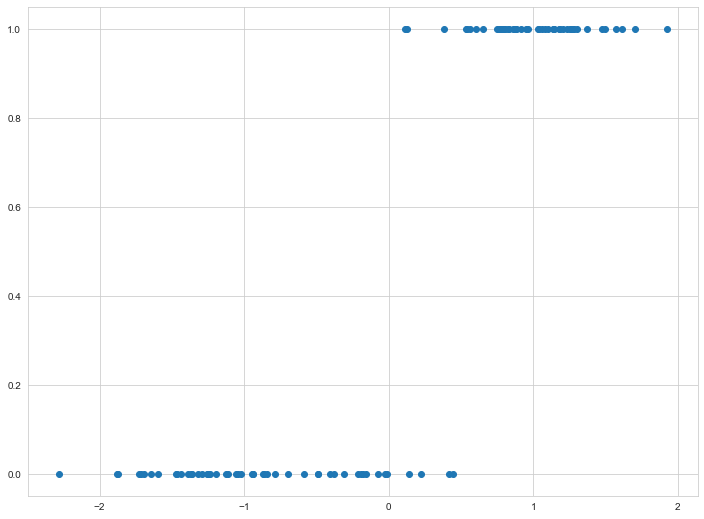

In [548]:
plt.scatter(X, y);

In [564]:
custom_log_reg = CustomLogisticRegression()
custom_log_reg.fit(X, y)
y_pred = custom_log_reg.predict(X)

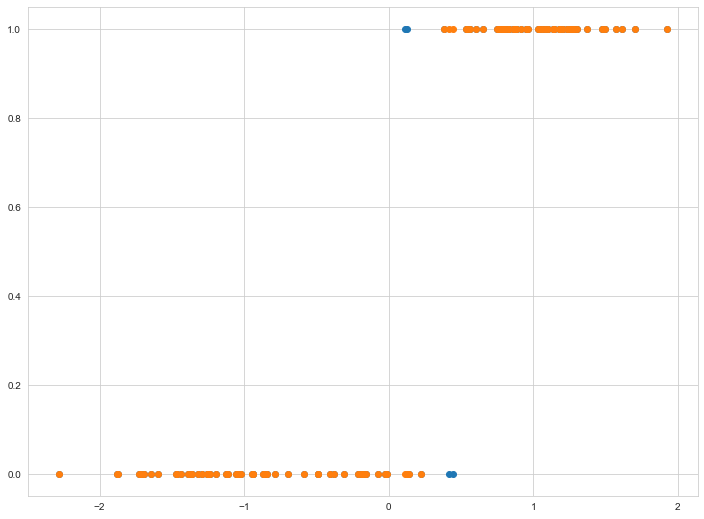

In [566]:
plt.scatter(X, y)
plt.scatter(X, y_pred);

Проверьте качество работы модели при помощи известных вам метрик бинарной классификации.

In [551]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [569]:
print(precision_score(y, y_pred))
print(recall_score(y, y_pred))
print(f1_score(y, y_pred))
print(accuracy_score(y, y_pred))

0.56
0.56
0.56
0.56


Так разве может быть? Но смотря на оценки всех метрик, то можно сказать, что наша модель праивльна в более чем 50% случаев

#### Задание 3.4. Применение логистической регрессии (5 баллов)

Мы будем использовать данные по свойствам покемонов (https://www.kaggle.com/abcsds/pokemon). В данном задании вам необходимо сначала сделать краткий EDA (Посмотреть на данные и их распределения, а также посмотреть, как различные признаки связаны между собой и с целевой переменной (`Legendary`)).

In [720]:
pokemon = pd.read_csv("Pokemon.csv")
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Сперва 'выбросим' несколько колонок, 1. `#` 2. `Name` - фактор, который мало на что влияет 3. `Type 1` и `Type 2` так как применить в данном ислледовании довольно трудно, но в будущем мы могли бы предположить, что каждый тип может нести в себе какую-либо оценку (Например Poison - 10, а Grass - 3), также этих классов очень много, поэтому опять не очень понятно, что с ними делать. Также Type 2 имеет много Na - мы могли бы преобразовать наш датасет так, чтобы Na превращалось в 0

`Generation` мы выкидывать не будем, так как мы можем предположить, что поколения напрямую влияет на вероятность стать покемона легендарным

In [721]:
pokemon = pokemon.drop(['#', 'Name','Type 1','Type 2'], axis=1)

НО! сперва EDA

In [722]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       800 non-null    int64
 1   HP          800 non-null    int64
 2   Attack      800 non-null    int64
 3   Defense     800 non-null    int64
 4   Sp. Atk     800 non-null    int64
 5   Sp. Def     800 non-null    int64
 6   Speed       800 non-null    int64
 7   Generation  800 non-null    int64
 8   Legendary   800 non-null    bool 
dtypes: bool(1), int64(8)
memory usage: 50.9 KB


Изменим True и False на 1 и 0

In [723]:
pokemon['Legendary'] = pokemon['Legendary'].astype(int)

Посмотрим на распределения. Тут, кстати, можно заметить, что Легендарных покемонов намного меньше!

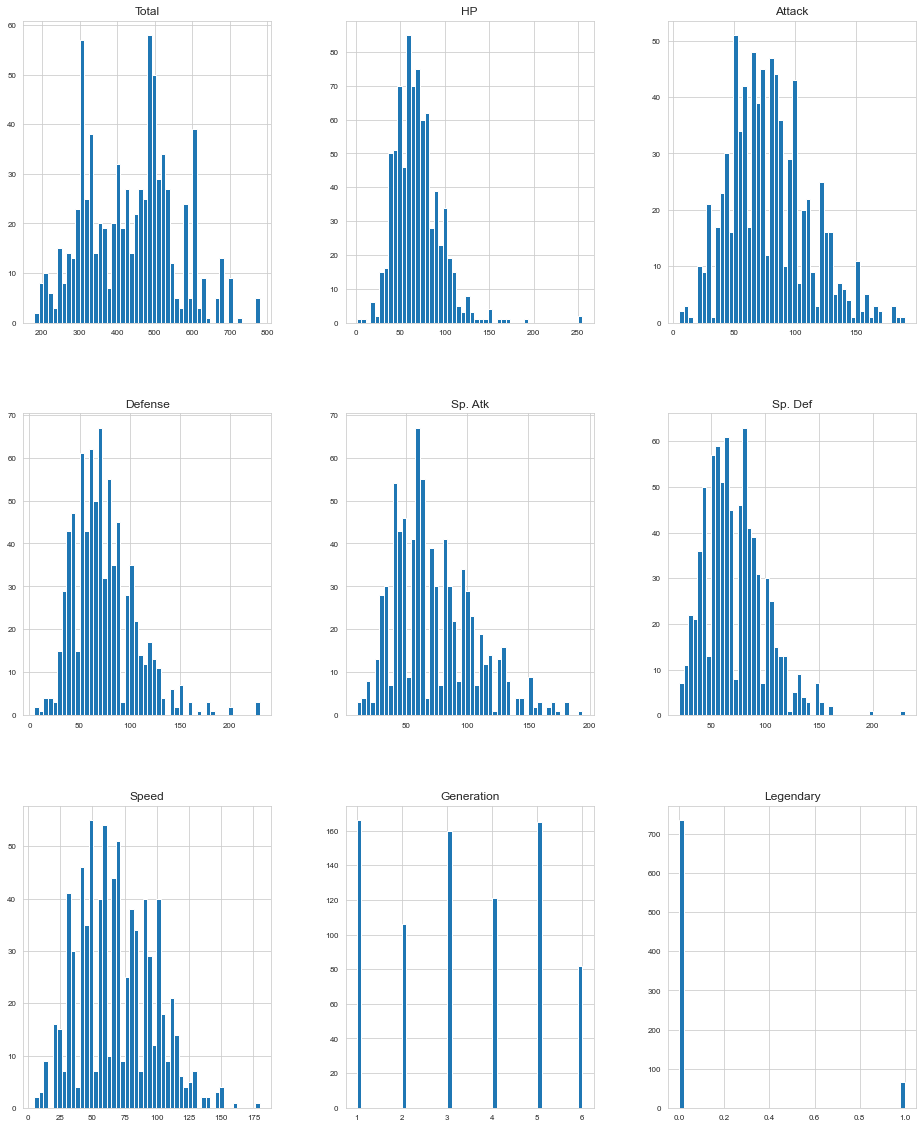

In [724]:
pokemon.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Посмотрим плоты, которые показывают зависимость нашей зависимой переменной от независимой

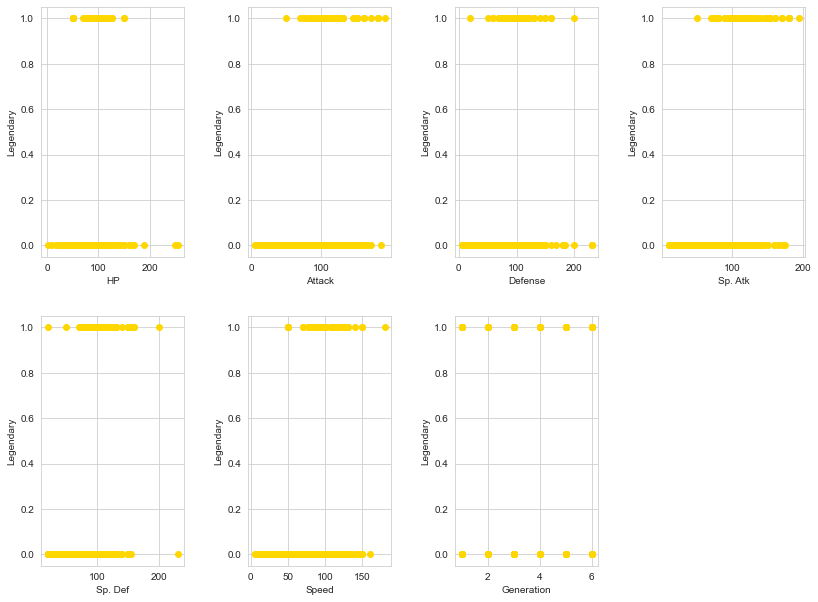

In [725]:
for i in range(1, len(pokemon.columns)-1):
    plt.subplot(2,4, i)
    plt.scatter(data = pokemon, x = pokemon.columns[i], y = pokemon.columns[-1], color = 'gold')
    plt.xlabel(pokemon.columns[i])
    plt.ylabel('Legendary')
plt.tight_layout(pad=3.0)

Корреляции между признаками

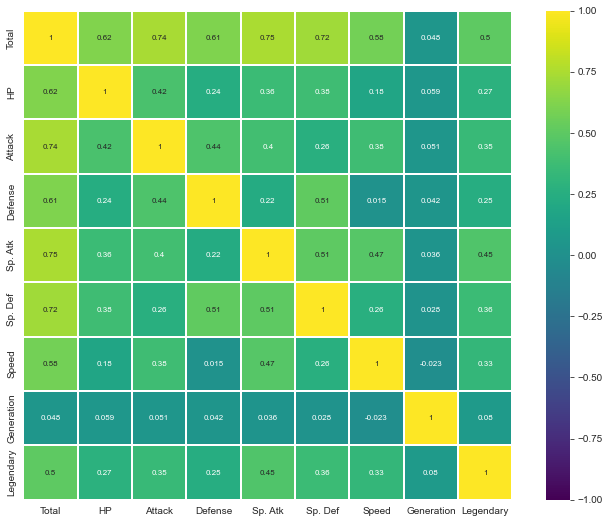

In [726]:
corr = pokemon.corr()
plt.figure()

sns.heatmap(corr, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Разделите ваши данные на тестовую и тренировочную выборку.

In [727]:
X = pokemon.drop('Legendary', axis=1)
y = pokemon['Legendary']

In [728]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)  

 ИНТЕРЕСНО! Если поставить `test_size` больше 0.3 и `random_state` меньше 100, то количества иттераций не хватает и на fit наша модель падает. Спросить в среду Данила и Лаврентия

Обучите модель `LogisticRegression` из `sklearn`.

In [729]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [730]:
y_pred = log_reg.predict(X_test)

In [731]:
print(classification_report(y_test,y_pred)) # прикольная функция!

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       213
           1       0.74      0.52      0.61        27

    accuracy                           0.93       240
   macro avg       0.84      0.75      0.78       240
weighted avg       0.92      0.93      0.92       240



Выведите метрики вашего классификатора:

1. Нарисуйте [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html).

2. Изобразите ROC кривую и посчитайте площадь под ней.

3. Скажите, какие признаки оказались наиболее важны для модели.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


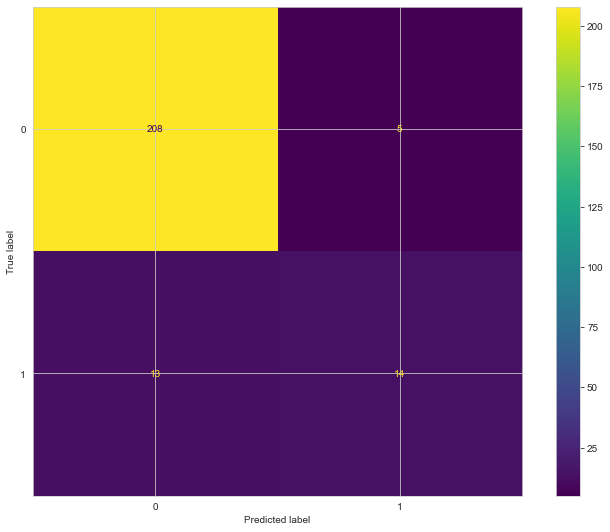

In [732]:
plot_confusion_matrix(log_reg, X_test, y_test)  

Модель справилась отлично, по-моему мнению. Так как нелегендарных покемонов больше, то соответственно и TN будет больше в нашем предикшоне! Стоит заметить, что TP и FN почти похожи, опять таки это может быть из-за распределения `Legendary` 

**Посторим ROC кривую**

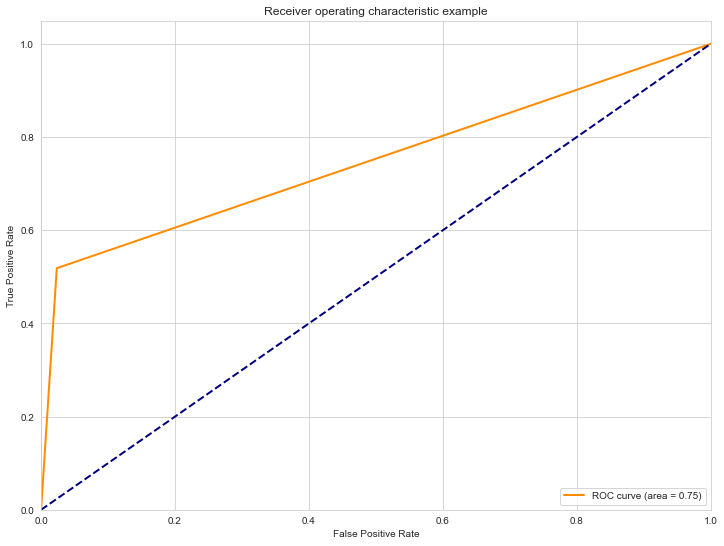

In [733]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Расчитывем площадь под ROC кривой

In [734]:
roc_auc

0.7475221700573813

Зная, что значение в данном случае может колебаться от 0 до 1, то наше значение говорит нам о том, что модель справляется успешно

**Посмотрим, какие признаки оказали наибольшее влияние**

In [735]:
log_reg.coef_

array([[ 0.03427963,  0.00177888, -0.01352244, -0.00067139,  0.00680322,
         0.02142483,  0.01846652,  0.51450307]])

Посмотрев на коэффициенты, мы можем с уверенностью сказать, что большее влияние имеет переменная `Generation`, кто бы мог подумать! При этом другие переменные почти не влияют на наше переменную!

In [740]:
X_test

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
484,300,57,24,86,24,86,23,4
218,455,70,80,65,90,65,85,2
589,508,110,135,60,50,65,88,5
776,600,90,100,70,110,150,80,6
359,290,45,100,45,45,45,10,3
...,...,...,...,...,...,...,...,...
586,313,55,45,43,55,43,72,5
461,424,70,94,50,94,50,66,4
505,454,74,100,72,90,72,46,4
790,245,40,30,35,45,40,55,6


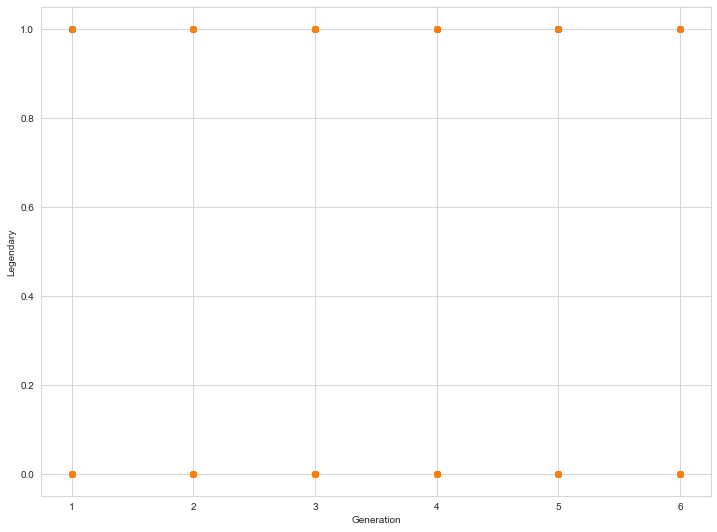

In [745]:
plt.scatter(X_test['Generation'],y_test)
plt.scatter(X_test['Generation'], y_pred)
plt.xlabel('Generation');
plt.ylabel('Legendary');

Точки совпадают, что, как мне кажется, не очень хорошо, подозрительно! В EDA наш признак `Generation` показал очень маленькую корреляцию между переменными. Возможно, ошибка была в том, что `Generation` был представлен в типе int, а не object, что могло как-то повлиять на нашу модель. 

### Задание 4. Расскажите о вашей любимой музыкальной группе (исполнителе) (0.5 балла)

Расскажите, как вы познакомились с этой группой и скиньте несколько наиболее любимых треков)

Я бы посоветовал послушать **Interpol**, ее мне подсказала подруга, когда на море отдыхали
Топ треки:
1. Rest My Chemistry
2. Everything is Wrong
3. Untitled

## Therapy time

Напишите здесь ваши впечатления о задании: было ли интересно, было ли слишком легко или наоборот сложно и тд. Также сюда можно написать свои идеи по улучшению заданий, а также предложить данные, на основе которых вы бы хотели построить следующие дз. 

**Ваши мысли:**

Очень круто, я аж о времени забыл, но очень трудно ориентироваться в большом объеме классов, так как если где-то допустил ошибку, сложно понять именно где, я целых четыре часа провозился, но только потом до меня дошло, что я не так заменял `pred` в массиве. Но не смотря на все, спасибо!